<a href="https://colab.research.google.com/github/brandnewmin/brandnewm/blob/master/randomforestmodel%2Bkmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.activity.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fexperimentsandconfigs%20https%3a%2f%2fwww.googleapis.com%2fauth%2fphotos.native&response_type=code

Enter your authorization code:
4/1AX4XfWjLS4nfEPlVEmSo86-GsVRZ9sTG4fX-4Qe-kHuoOomfXRdBTRztcjc
Mounted at /content/drive


In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 40 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (8,541 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 160837 files and d

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
zzin = pd.read_csv('/content/drive/MyDrive/data/찐2.csv')
zzin

,Unnamed: 0,행 레이블,구,전체교통량평균,bins,교통사고건수,속도가중치,결빙사고다발지,위험요소,상습결빙지역건수,range
0,0,강남대로,강남구,1187.870491,6,215,1,6,1,0,6.760808
1,1,강남순환로,금천구,1640.678244,0,4,0,0,0,0,7.921154
2,2,강변북로,용산구,4658.535880,0,0,1,0,0,1,21.387434
3,3,강변북로,마포구,4812.331690,0,0,1,0,0,1,14.191764
4,4,강서로,강서구,759.022774,2,130,1,0,0,0,2.992709
...,...,...,...,...,...,...,...,...,...,...,...
71,72,평창문화로,종로구,842.001488,2,29,0,0,0,1,4.349077
72,73,헌릉로,강남구,1257.694598,2,23,0,0,0,0,7.566000
73,74,화곡로,양천구,715.305438,1,29,0,0,0,0,5.324872
74,75,화랑로,성북구,1395.647641,0,50,0,0,0,0,5.041615


In [ ]:
zzin.drop(['Unnamed: 0'], axis = 1, inplace = True)
zzin['roadlabel'] = zzin['행 레이블'] + " " + zzin['구']

In [ ]:
zzin.columns = ['label','gu','mean','bins','count','weight','place','danger','icecount','range','roadlabel']
"""
label : 행 레이블  / bins : bins 
gu : 구  / count : 교통사고건수
mean : 전체 교통량 평균 / weight : 가중치
place : 결빙사고다발지
danger : 위험요소
icecount : 상습결빙지역건수
"""

'\nlabel : 행 레이블  / bins : bins \ngu : 구  / count : 교통사고건수\nmean : 전체 교통량 평균 / weight : 가중치\nplace : 결빙사고다발지\ndanger : 위험요소\nicecount : 상습결빙지역건수\n'

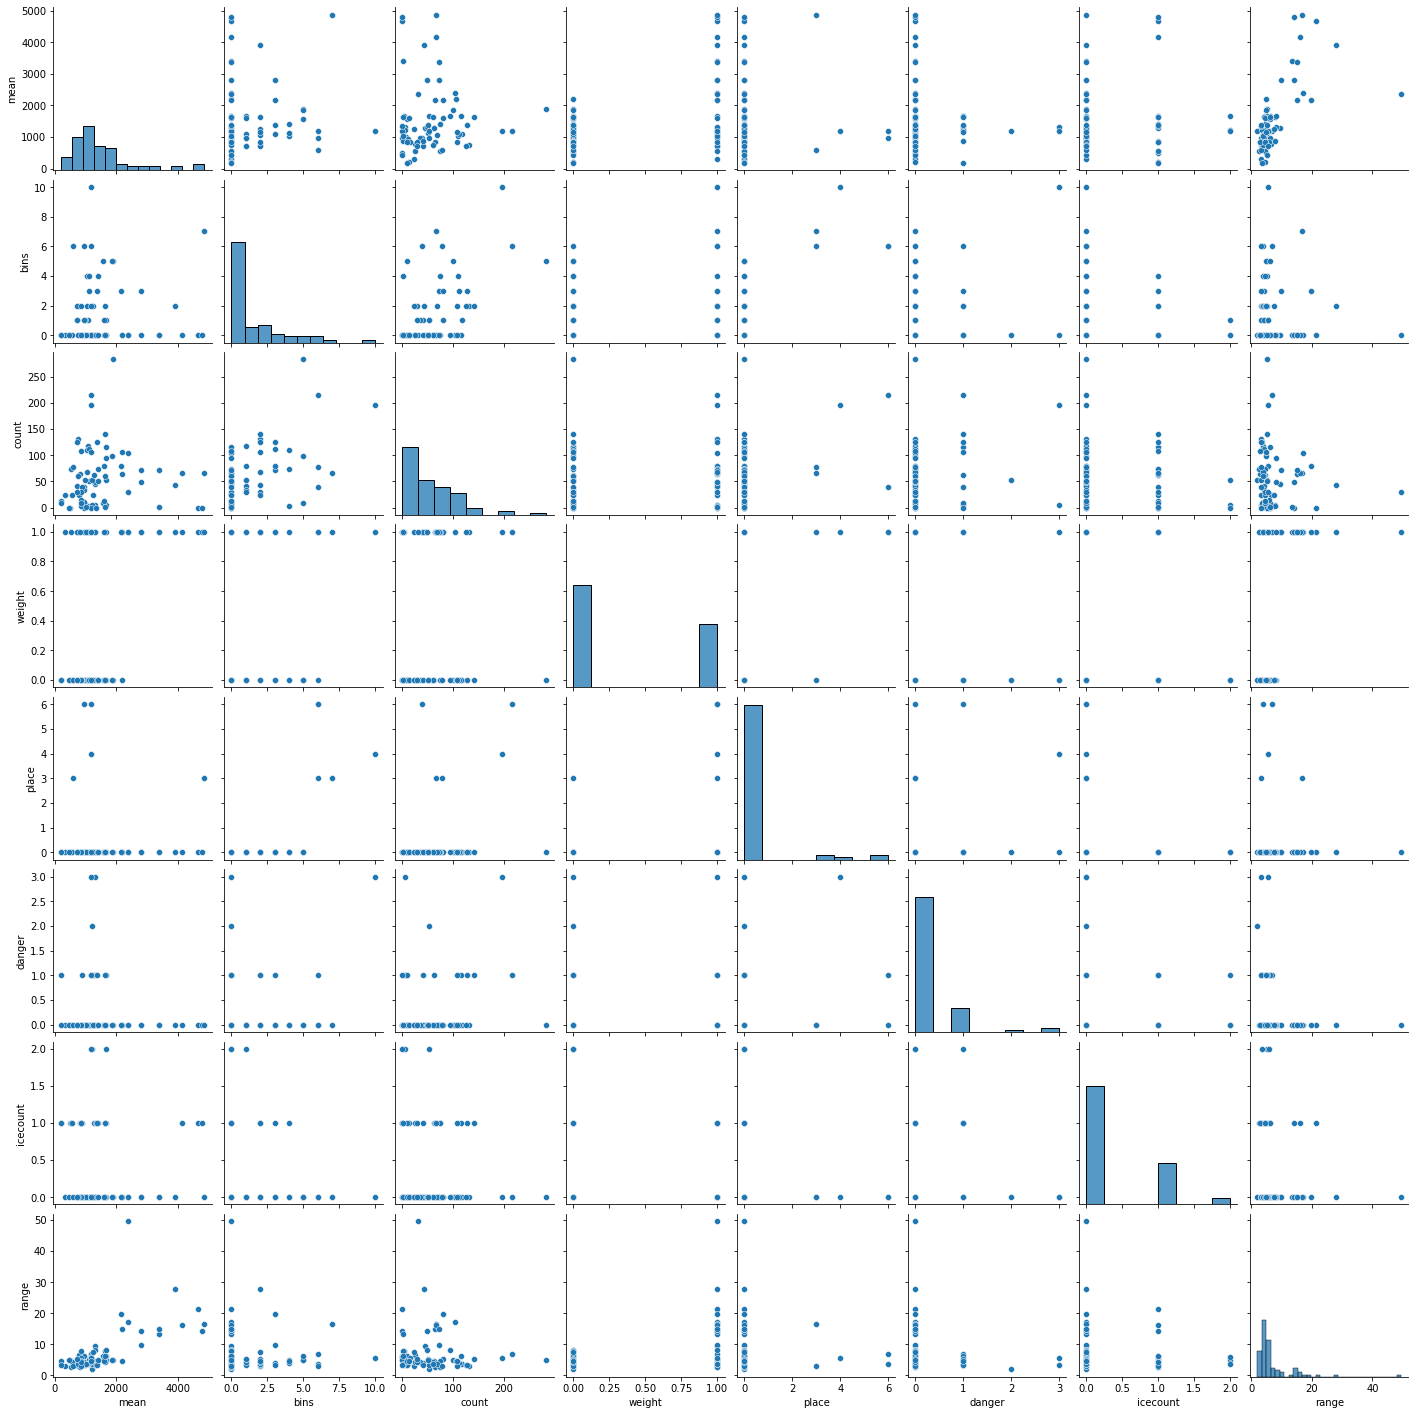

In [ ]:
sns.pairplot(zzin)
plt.show()

In [ ]:
#눈 온 날과 눈 오지 않은 날의 속도 차이가 크고
#교통량이 많은 집단이 가장 중요할 것 같아서
#두 값으로 clustering 진행해서
# 0 1 집단 지정
# randomforest로 나머지 변수들까지 포함해서 가중치 정하기

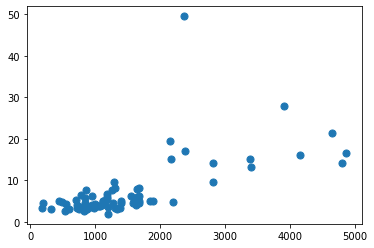

In [ ]:
from sklearn.cluster import KMeans


plt.scatter(zzin['mean'], zzin['range'], s = 50)
kmeans = KMeans(n_clusters = 3)

X = zzin[['mean','range']]

y_pred = kmeans.fit_predict(X)

In [ ]:
print(kmeans.predict(X))
print(kmeans.cluster_centers_) #각 군집의 평균값

[0 2 1 1 0 0 1 1 0 2 0 0 0 0 2 2 2 2 2 0 0 0 2 2 0 0 2 0 0 0 2 0 0 2 2 0 2
 0 2 2 0 0 0 0 0 0 0 0 2 0 0 0 2 0 0 0 1 1 1 0 0 0 0 0 0 0 2 2 0 0 0 0 0 0
 0 0]
[[ 942.84657047    4.50212147]
 [4171.553452     17.782621  ]
 [1934.3557691    10.1548735 ]]


In [ ]:
kmeans.labels_

array([0, 2, 1, 1, 0, 0, 1, 1, 0, 2, 0, 0, 0, 0, 2, 2, 2, 2, 2, 0, 0, 0,
       2, 2, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2, 2, 0, 2, 0, 2, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       2, 2, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

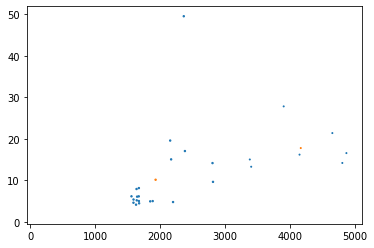

In [ ]:
plt.scatter(X['mean'], X['range'], kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], [0,1,2])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


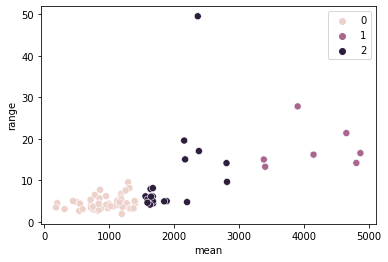

In [ ]:
sns.scatterplot(X['mean'], X['range'], kmeans.labels_, s = 50)
#sns.scatterplot(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], [0,1,2], s = 50)

In [ ]:
y_pred

array([0, 2, 1, 1, 0, 0, 1, 1, 0, 2, 0, 0, 0, 0, 2, 2, 2, 2, 2, 0, 0, 0,
       2, 2, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2, 2, 0, 2, 0, 2, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       2, 2, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [ ]:
y = pd.DataFrame(y_pred)
zzin2 = pd.concat([zzin, y], axis=1)

In [ ]:
zzin2.columns = ['label',        'gu',      'mean',      'bins',     'count',
          'weight',     'place',    'danger',  'icecount',     'range',
       'roadlabel',           'y']

In [ ]:
zzin2

,label,gu,mean,bins,count,weight,place,danger,icecount,range,roadlabel,y
y,강남대로,강남구,1187.870491,6,215,1,6,1,0,6.760808,강남대로 강남구,0
1,강남순환로,금천구,1640.678244,0,4,0,0,0,0,7.921154,강남순환로 금천구,2
2,강변북로,용산구,4658.535880,0,0,1,0,0,1,21.387434,강변북로 용산구,1
3,강변북로,마포구,4812.331690,0,0,1,0,0,1,14.191764,강변북로 마포구,1
4,강서로,강서구,759.022774,2,130,1,0,0,0,2.992709,강서로 강서구,0
...,...,...,...,...,...,...,...,...,...,...,...,...
71,평창문화로,종로구,842.001488,2,29,0,0,0,1,4.349077,평창문화로 종로구,0
72,헌릉로,강남구,1257.694598,2,23,0,0,0,0,7.566000,헌릉로 강남구,0
73,화곡로,양천구,715.305438,1,29,0,0,0,0,5.324872,화곡로 양천구,0
74,화랑로,성북구,1395.647641,0,50,0,0,0,0,5.041615,화랑로 성북구,0


In [ ]:
#클러스터링 완료했고  : 한 이유는, 교통량과 속도 차이 변수가 가장 입지 선점에 중요하다고 임의로 판단해서 일단 두 개로 클러스터링
#랜덤포레스트로 각 변수 별 가중치는 알고 싶어하는 것 같아서

In [ ]:
zzin2[zzin2['y'] == 2]

In [ ]:
zzin21 = zzin2[zzin2['y'] == 1]
zzin21

,label,gu,mean,bins,count,weight,place,danger,icecount,range,roadlabel,y
2,강변북로,용산구,4658.535880,0,0,1,0,0,1,21.387434,강변북로 용산구,1
3,강변북로,마포구,4812.331690,0,0,1,0,0,1,14.191764,강변북로 마포구,1
6,경부고속도로,서초구,3908.324718,2,43,1,0,0,0,27.813041,경부고속도로 서초구,1
7,경인고속국도,양천구,3407.806748,0,1,1,0,0,0,13.287100,경인고속국도 양천구,1
56,올림픽대로,동작구,4875.099378,7,66,1,3,0,0,16.567154,올림픽대로 동작구,1
57,올림픽대로,강동구,4152.652500,0,65,1,0,0,1,16.200147,올림픽대로 강동구,1
58,올림픽대로,강서구,3386.123250,0,71,1,0,0,0,15.031706,올림픽대로 강서구,1


In [ ]:
y = y.rename(columns = {0 : 'y'})

In [ ]:
from sklearn.ensemble import RandomForestClassifier

#y1 = y[y['y'] == 1]

model = RandomForestClassifier()
model.fit(zzin2.iloc[:,2:10],y)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
model_importances = pd.Series(model.feature_importances_, index = zzin21.iloc[:,2:10].columns)
modelweight = model_importances.sort_values(ascending=False)

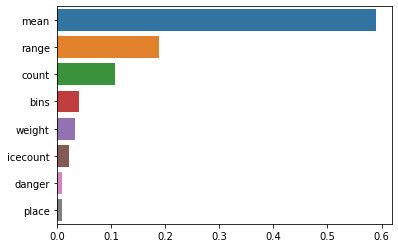

In [ ]:
sns.barplot(x = modelweight, y = modelweight.index)
plt.show()
#모든 집단에 대한 randomforest
#mean이 가장 크고 range > count > bins 이런 식이다
#당연한 결과인가

# 2차 시도

In [ ]:
zzin

,label,gu,mean,bins,count,weight,place,danger,icecount,range,roadlabel
0,강남대로,강남구,1187.870491,6,215,1,6,1,0,6.760808,강남대로 강남구
1,강남순환로,금천구,1640.678244,0,4,0,0,0,0,7.921154,강남순환로 금천구
2,강변북로,용산구,4658.535880,0,0,1,0,0,1,21.387434,강변북로 용산구
3,강변북로,마포구,4812.331690,0,0,1,0,0,1,14.191764,강변북로 마포구
4,강서로,강서구,759.022774,2,130,1,0,0,0,2.992709,강서로 강서구
...,...,...,...,...,...,...,...,...,...,...,...
71,평창문화로,종로구,842.001488,2,29,0,0,0,1,4.349077,평창문화로 종로구
72,헌릉로,강남구,1257.694598,2,23,0,0,0,0,7.566000,헌릉로 강남구
73,화곡로,양천구,715.305438,1,29,0,0,0,0,5.324872,화곡로 양천구
74,화랑로,성북구,1395.647641,0,50,0,0,0,0,5.041615,화랑로 성북구


In [ ]:
#정규화 : 각 column의 값 상대적인 크기 때문에 분석 결과가 달라질 수 있기 때문에 정규화가 필요하다.
#정규화에 여러 방법이 있는데, min-max만?
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

zzin_2 = scaler.fit_transform(zzin[['mean','bins','count','weight','danger','icecount','range']])
zzin_2

array([[0.21393596, 0.6       , 0.75971731, 1.        , 0.33333333,
        0.        , 0.10160155],
       [0.31046805, 0.        , 0.01413428, 0.        , 0.        ,
        0.        , 0.1259844 ],
       [0.95383178, 0.        , 0.        , 1.        , 0.        ,
        0.5       , 0.40895713],
       [0.98661883, 0.        , 0.        , 1.        , 0.        ,
        0.5       , 0.25775143],
       [0.12251181, 0.2       , 0.45936396, 1.        , 0.        ,
        0.        , 0.02242087],
       [0.06610299, 0.        , 0.        , 0.        , 0.        ,
        0.5       , 0.06127273],
       [0.79389758, 0.2       , 0.15194346, 1.        , 0.        ,
        0.        , 0.54398116],
       [0.68719437, 0.        , 0.00353357, 1.        , 0.        ,
        0.        , 0.23874133],
       [0.17352237, 0.        , 0.02120141, 0.        , 0.        ,
        0.        , 0.05168137],
       [0.31896278, 0.        , 0.01413428, 1.        , 0.33333333,
        0.        , 0.0

In [ ]:
zzin['place'].value_counts()
#3 -> 1
#4 -> 2
#6 -> 3 으로 변경하면 낫나?

0    71
6     2
3     2
4     1
Name: place, dtype: int64

In [ ]:
#위에 변경 안하고 randomforest
from sklearn.ensemble import RandomForestClassifier

model2 = RandomForestClassifier()
model2.fit(zzin[['mean','bins','count','weight','danger','icecount','range']],zzin[['place']])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
model_importances2 = pd.Series(model2.feature_importances_, index = zzin[['mean','bins','count','weight','danger','icecount','range']].columns)
modelweight2 = model_importances2.sort_values(ascending=False)

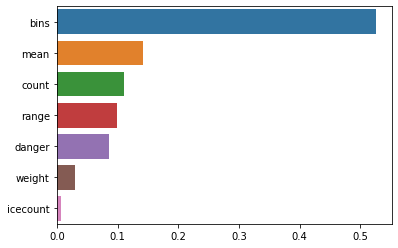

In [ ]:
sns.barplot(x = modelweight2, y = modelweight2.index)
plt.show()

# 2-1 시도

In [ ]:
zzin

,label,gu,mean,bins,count,weight,place,danger,icecount,range,roadlabel
0,강남대로,강남구,1187.870491,6,215,1,6,1,0,6.760808,강남대로 강남구
1,강남순환로,금천구,1640.678244,0,4,0,0,0,0,7.921154,강남순환로 금천구
2,강변북로,용산구,4658.535880,0,0,1,0,0,1,21.387434,강변북로 용산구
3,강변북로,마포구,4812.331690,0,0,1,0,0,1,14.191764,강변북로 마포구
4,강서로,강서구,759.022774,2,130,1,0,0,0,2.992709,강서로 강서구
...,...,...,...,...,...,...,...,...,...,...,...
71,평창문화로,종로구,842.001488,2,29,0,0,0,1,4.349077,평창문화로 종로구
72,헌릉로,강남구,1257.694598,2,23,0,0,0,0,7.566000,헌릉로 강남구
73,화곡로,양천구,715.305438,1,29,0,0,0,0,5.324872,화곡로 양천구
74,화랑로,성북구,1395.647641,0,50,0,0,0,0,5.041615,화랑로 성북구


In [ ]:
model201 = RandomForestClassifier()
model201.fit(zzin[['mean','bins','count','weight','danger','icecount','range']],zzin[['place']])

# 3차 시도


In [ ]:
#클러스터링 하기 전, 두 feature 한정해서 정규화

#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()

zzin_3 = scaler.fit_transform(zzin[['mean','range']])
X = pd.DataFrame(zzin_3)

X.columns = ['mean','range']

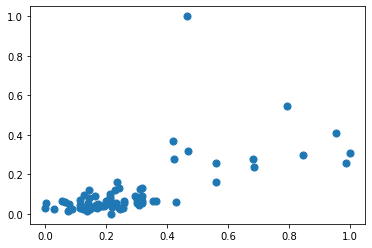

In [ ]:
from sklearn.cluster import KMeans

plt.scatter(X.iloc[:,0], X.iloc[:,1], s = 50)
kmeans3 = KMeans(n_clusters = 4) #임의로 4개, 변경 가능(아마도 이상치 제거해야?)


y_pred3 = kmeans3.fit_predict(X)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


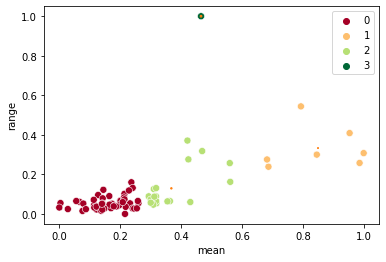

In [ ]:
#클러스터링 시각화
sns.scatterplot(X.iloc[:,0], X.iloc[:,1],kmeans3.labels_, s = 50, palette = 'RdYlGn')
plt.scatter(kmeans3.cluster_centers_[:,0], kmeans3.cluster_centers_[:,1], [0,1,2,3]) #main 포인트만 몇 개 선별해서 보여주는듯

In [ ]:
#라벨링을 데이터 프레임으로 만들어ㅅ
y = pd.DataFrame(y_pred3)
y.rename(columns = {0 : 'y'})

In [ ]:
XR=pd.concat([X, y], axis = 1)
XR.columns = ['mean_nor', 'range_nor', 'y']
zzin03 = pd.concat([zzin, XR], axis = 1)

In [ ]:
#랜덤 포레스트 하기 전에, 근데 두 변수만 정규화해서 해도 되나?
zzin03

,label,gu,mean,bins,count,weight,place,danger,icecount,range,roadlabel,mean_nor,range_nor,y
0,강남대로,강남구,1187.870491,6,215,1,6,1,0,6.760808,강남대로 강남구,0.213936,0.101602,0
1,강남순환로,금천구,1640.678244,0,4,0,0,0,0,7.921154,강남순환로 금천구,0.310468,0.125984,2
2,강변북로,용산구,4658.535880,0,0,1,0,0,1,21.387434,강변북로 용산구,0.953832,0.408957,1
3,강변북로,마포구,4812.331690,0,0,1,0,0,1,14.191764,강변북로 마포구,0.986619,0.257751,1
4,강서로,강서구,759.022774,2,130,1,0,0,0,2.992709,강서로 강서구,0.122512,0.022421,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,평창문화로,종로구,842.001488,2,29,0,0,0,1,4.349077,평창문화로 종로구,0.140202,0.050923,0
72,헌릉로,강남구,1257.694598,2,23,0,0,0,0,7.566000,헌릉로 강남구,0.228821,0.118521,0
73,화곡로,양천구,715.305438,1,29,0,0,0,0,5.324872,화곡로 양천구,0.113192,0.071428,0
74,화랑로,성북구,1395.647641,0,50,0,0,0,0,5.041615,화랑로 성북구,0.258231,0.065475,0


In [ ]:
#from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(zzin2.iloc[:,2:10],y)

In [ ]:
#연습 많이 했다!

# 시각화

In [ ]:
zzin

,label,gu,mean,bins,count,weight,place,danger,icecount,range,roadlabel
0,강남대로,강남구,1187.870491,6,215,1,6,1,0,6.760808,강남대로 강남구
1,강남순환로,금천구,1640.678244,0,4,0,0,0,0,7.921154,강남순환로 금천구
2,강변북로,용산구,4658.535880,0,0,1,0,0,1,21.387434,강변북로 용산구
3,강변북로,마포구,4812.331690,0,0,1,0,0,1,14.191764,강변북로 마포구
4,강서로,강서구,759.022774,2,130,1,0,0,0,2.992709,강서로 강서구
...,...,...,...,...,...,...,...,...,...,...,...
71,평창문화로,종로구,842.001488,2,29,0,0,0,1,4.349077,평창문화로 종로구
72,헌릉로,강남구,1257.694598,2,23,0,0,0,0,7.566000,헌릉로 강남구
73,화곡로,양천구,715.305438,1,29,0,0,0,0,5.324872,화곡로 양천구
74,화랑로,성북구,1395.647641,0,50,0,0,0,0,5.041615,화랑로 성북구


In [ ]:
#시각화 할 것 : 